In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.utils import resample
import shap



In [2]:

# Importing the datasets
datasets = pd.read_csv('Files/P.csv')
datasets = datasets.fillna(0)
datasets_cont = datasets[datasets['contact'] == True]
datasets_no_cont = datasets[datasets['contact'] == False]
datasets_no_cont1 = resample(datasets, replace=False,n_samples=5681)

datasets_cont.shape
datasets_no_cont1.shape

master_new = datasets_cont.append(datasets_no_cont1)
master_new.head()
# datasets['contact'].value_counts()
# datasets['category'].value_counts()
# # CustomerHisstory['AgeCategory'].value_counts()

(5681, 12)

(5681, 12)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,row_number,user_num,pro_num,search_rank,category,geo_num,contact,cost_estimate,num_reviews,avg_rating,dist,search_rank_alt
472,473,104,176,2,Lawn Mowing and Trimming,3,True,0.0,20,4.80,2,1
480,481,106,83,2,Full Service Lawn Care,3,True,70.0,50,4.88,11,2
481,482,106,174,3,Full Service Lawn Care,3,True,45.0,33,4.82,10,3
483,484,106,195,5,Full Service Lawn Care,3,True,0.0,48,4.67,22,4
486,487,107,162,3,Lawn Mowing and Trimming,1,True,0.0,170,4.75,20,2


In [3]:
#create dummy for category
master_new= pd.get_dummies(master_new, columns=['category'])
master_new.head(2)
master_new.shape

,row_number,user_num,pro_num,search_rank,geo_num,contact,cost_estimate,num_reviews,avg_rating,dist,search_rank_alt,category_Full Service Lawn Care,category_Lawn Mowing and Trimming,category_Outdoor Landscaping and Design
472,473,104,176,2,3,True,0.0,20,4.80,2,1,0,1,0
480,481,106,83,2,3,True,70.0,50,4.88,11,2,1,0,0


(11362, 14)

In [4]:

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

train, test = train_test_split(master_new, test_size=0.2, stratify=master_new['contact']) 
train['contact'].value_counts()
test['contact'].value_counts()


X_Train = train.iloc[:, [2,3,4,6,7,8,9,10,11,12,13]].values
Y_Train = train.iloc[:, 5].values

X_Test = test.iloc[:, [2,3,4,6,7,8,9,10,11,12,13]].values
Y_Test = test.iloc[:, 5].values

train.shape
test.shape

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)



True     4790
False    4299
Name: contact, dtype: int64

True     1198
False    1075
Name: contact, dtype: int64

(9089, 14)

(2273, 14)

In [11]:
#  Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier.fit(X_Train,Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
from sklearn.metrics import accuracy_score


RandomForestClassifier(random_state=0)

In [12]:
print(cm)
print('Model accuracy: {0:0.4f}'. format(accuracy_score(Y_Test, Y_Pred)))

[[717 358]
 [278 920]]
Model accuracy: 0.7202


array([0.1392911 , 0.16360266, 0.03041569, 0.06701647, 0.13076791,
       0.09171671, 0.22292106, 0.10791024, 0.01455059, 0.01183183,
       0.01997575])

<BarContainer object of 11 artists>

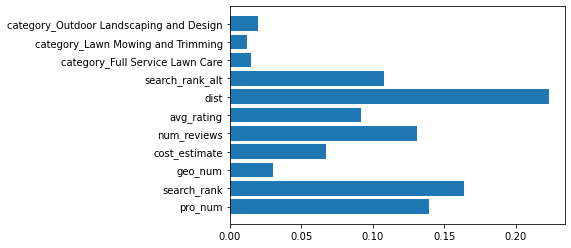

In [13]:
Name = test.iloc[:, [2,3,4,6,7,8,9,10,11,12,13]]
names = np.array(Name.columns)

classifier.feature_importances_
plt.barh(names, classifier.feature_importances_)
# plt.barh(list(master.columns), classifier.feature_importances_)

In [14]:
from sklearn import tree
fn=names
# cn=data.target_names
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(classifier.estimators_[0],
#                feature_names = fn, 
#                class_names='contact',
#                filled = True);
# fig.savefig('rf_individualtree.png')



fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(classifier.estimators_[index],
                   feature_names = fn, 
                   class_names='contact',
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')




[Text(0.2526859271832059, 0.9827586206896551, 'pro_num <= -1.272\ngini = 0.498\nsamples = 5730\nvalue = [4284, 4805]\nclass = o'),
 Text(0.0481570965564868, 0.9482758620689655, 'search_rank <= -0.221\ngini = 0.404\nsamples = 526\nvalue = [587, 229]\nclass = c'),
 Text(0.015091855793075305, 0.9137931034482759, 'pro_num <= -1.564\ngini = 0.5\nsamples = 231\nvalue = [175, 173]\nclass = c'),
 Text(0.00276234422575886, 0.8793103448275862, 'dist <= -0.649\ngini = 0.406\nsamples = 38\nvalue = [43, 17]\nclass = c'),
 Text(0.0015067332140502872, 0.8448275862068966, 'dist <= -0.852\ngini = 0.355\nsamples = 8\nvalue = [3, 10]\nclass = o'),
 Text(0.0010044888093668583, 0.8103448275862069, 'cost_estimate <= 0.164\ngini = 0.375\nsamples = 3\nvalue = [3, 1]\nclass = c'),
 Text(0.0005022444046834291, 0.7758620689655172, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = c'),
 Text(0.0015067332140502872, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = o'),
 Text(0.00200897761873371

Text(0.5, 1.0, 'Estimator: 0')

[Text(0.6223985106038921, 0.9833333333333333, 'search_rank_alt <= 0.913\ngini = 0.498\nsamples = 5740\nvalue = [4258, 4831]\nclass = o'),
 Text(0.27521029583169293, 0.95, 'pro_num <= -1.289\ngini = 0.494\nsamples = 4978\nvalue = [3545, 4380]\nclass = o'),
 Text(0.04801739614932211, 0.9166666666666666, 'search_rank <= -0.221\ngini = 0.403\nsamples = 514\nvalue = [585, 227]\nclass = c'),
 Text(0.03226954745248561, 0.8833333333333333, 'avg_rating <= 0.485\ngini = 0.5\nsamples = 202\nvalue = [161, 162]\nclass = o'),
 Text(0.01823190738562496, 0.85, 'num_reviews <= -0.331\ngini = 0.493\nsamples = 172\nvalue = [120, 151]\nclass = o'),
 Text(0.008357580635176129, 0.8166666666666667, 'dist <= 2.199\ngini = 0.462\nsamples = 49\nvalue = [51, 29]\nclass = c'),
 Text(0.006314616479910853, 0.7833333333333333, 'category_Lawn Mowing and Trimming <= 0.349\ngini = 0.428\nsamples = 43\nvalue = [49, 22]\nclass = c'),
 Text(0.004705008357580635, 0.75, 'dist <= -0.242\ngini = 0.38\nsamples = 32\nvalue = [3

Text(0.5, 1.0, 'Estimator: 1')

[Text(0.8621571200648784, 0.984375, 'search_rank_alt <= 1.235\ngini = 0.499\nsamples = 5704\nvalue = [4297, 4792]\nclass = o'),
 Text(0.7581640266480645, 0.953125, 'search_rank <= 0.808\ngini = 0.496\nsamples = 5175\nvalue = [3733, 4486]\nclass = o'),
 Text(0.5938081606838894, 0.921875, 'search_rank <= -0.221\ngini = 0.484\nsamples = 4696\nvalue = [3060, 4410]\nclass = o'),
 Text(0.386863666050245, 0.890625, 'cost_estimate <= 0.071\ngini = 0.465\nsamples = 3027\nvalue = [1785, 3062]\nclass = o'),
 Text(0.20363771426506502, 0.859375, 'num_reviews <= -0.573\ngini = 0.455\nsamples = 2619\nvalue = [1453, 2701]\nclass = o'),
 Text(0.11323728004916549, 0.828125, 'category_Full Service Lawn Care <= 0.577\ngini = 0.495\nsamples = 749\nvalue = [538, 659]\nclass = o'),
 Text(0.07657847069478588, 0.796875, 'cost_estimate <= -0.16\ngini = 0.5\nsamples = 580\nvalue = [466, 464]\nclass = c'),
 Text(0.04014304890671497, 0.765625, 'pro_num <= 1.491\ngini = 0.483\nsamples = 324\nvalue = [314, 216]\ncla

Text(0.5, 1.0, 'Estimator: 2')

[Text(0.7476458625730831, 0.9838709677419355, 'category_Full Service Lawn Care <= 0.577\ngini = 0.499\nsamples = 5773\nvalue = [4302, 4787]\nclass = o'),
 Text(0.5936711394533554, 0.9516129032258065, 'search_rank <= 0.808\ngini = 0.5\nsamples = 4300\nvalue = [3420, 3324]\nclass = c'),
 Text(0.4608683153433769, 0.9193548387096774, 'cost_estimate <= 0.108\ngini = 0.493\nsamples = 3654\nvalue = [2531, 3199]\nclass = o'),
 Text(0.2669246317706092, 0.8870967741935484, 'num_reviews <= -0.573\ngini = 0.488\nsamples = 3382\nvalue = [2228, 3064]\nclass = o'),
 Text(0.08186924450899759, 0.8548387096774194, 'pro_num <= 0.983\ngini = 0.495\nsamples = 1187\nvalue = [1013, 830]\nclass = c'),
 Text(0.03731431007826073, 0.8225806451612904, 'category_Lawn Mowing and Trimming <= 0.349\ngini = 0.405\nsamples = 484\nvalue = [533, 209]\nclass = c'),
 Text(0.020872184765456894, 0.7903225806451613, 'pro_num <= 0.757\ngini = 0.316\nsamples = 335\nvalue = [409, 100]\nclass = c'),
 Text(0.007379779722341765, 0.

Text(0.5, 1.0, 'Estimator: 3')

[Text(0.3773966266781722, 0.9838709677419355, 'pro_num <= -1.289\ngini = 0.498\nsamples = 5733\nvalue = [4284, 4805]\nclass = o'),
 Text(0.057674828913601366, 0.9516129032258065, 'avg_rating <= 0.348\ngini = 0.416\nsamples = 548\nvalue = [622, 260]\nclass = c'),
 Text(0.04092707442258341, 0.9193548387096774, 'pro_num <= -1.414\ngini = 0.463\nsamples = 392\nvalue = [401, 230]\nclass = c'),
 Text(0.024196504949285103, 0.8870967741935484, 'category_Outdoor Landscaping and Design <= 0.173\ngini = 0.5\nsamples = 206\nvalue = [169, 161]\nclass = c'),
 Text(0.012487779542954906, 0.8548387096774194, 'cost_estimate <= 0.446\ngini = 0.476\nsamples = 92\nvalue = [60, 94]\nclass = o'),
 Text(0.008325186361969938, 0.8225806451612904, 'pro_num <= -1.544\ngini = 0.492\nsamples = 83\nvalue = [59, 76]\nclass = o'),
 Text(0.0014664548454112183, 0.7903225806451613, 'dist <= -0.75\ngini = 0.417\nsamples = 18\nvalue = [19, 8]\nclass = c'),
 Text(0.0009776365636074789, 0.7580645161290323, 'gini = 0.0\nsampl

Text(0.5, 1.0, 'Estimator: 4')

Error in callback <function flush_figures at 0x7fea92c7e3a0> (for post_execute):


KeyboardInterrupt: 

In [9]:
classifier.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=209652396)